# ROMY - Barometer

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from src.baroseis import baroseis

In [2]:
# load config
config = baroseis.load_from_yaml("./data/config_FFBI_ROMY_20240315_file.yaml")
# config = baroseis.load_from_yaml("./data/config_FFBI_ROMY_20240324_file.yaml")
# config = baroseis.load_from_yaml("./data/config_FFBI_ROMY_20240423_file.yaml")


In [3]:
# Initialize baroseis object
bs = baroseis(conf=config)

# Load data specified in config
bs.load_data()

Creating new Hilbert transform data...
 -> No resampling required!
 >Warning: Number of samples mismatch in channels: ['BW.FFBI..BDO=18001 samples', 'BW.ROMY.40.BJN=18000 samples', 'BW.ROMY.40.BJE=18000 samples']
5 Trace(s) in Stream:
BW.FFBI..BDO   | 2024-03-15T14:00:00.005000Z - 2024-03-15T18:59:59.005000Z | 1.0 Hz, 18000 samples
BW.ROMY.40.BJE | 2024-03-15T14:00:00.047799Z - 2024-03-15T18:59:59.047799Z | 1.0 Hz, 18000 samples
BW.ROMY.40.BJN | 2024-03-15T14:00:00.012800Z - 2024-03-15T18:59:59.012800Z | 1.0 Hz, 18000 samples
BW.ROMY.40.BJZ | 2024-03-15T14:00:00.004199Z - 2024-03-15T18:59:59.004199Z | 1.0 Hz, 18000 samples
BW.FFBI..BDH   | 2024-03-15T14:00:00.005000Z - 2024-03-15T18:59:59.005000Z | 1.0 Hz, 18000 samples

>Runtime: 0.0 minutes



In [4]:

# Can also override time window
# bs.load_data(
#     tbeg="2025-02-20 07:00",
#     tend="2025-02-20 10:00",
# )

# bs.load_data(
#     tbeg="2024-04-23 02:00",
#     tend="2024-04-23 05:00",
# )

# good event
# bs.load_data(
    # tbeg="2024-03-15 15:00",
    # tend="2024-03-15 18:00",
# )

# good event
# bs.load_data(
#     tbeg="2024-03-24 15:00",
#     tend="2024-03-24 17:00",
# )

# bad event
# bs.load_data(
#     tbeg="2025-02-20 07:00",
#     tend="2025-02-20 10:00",
# )

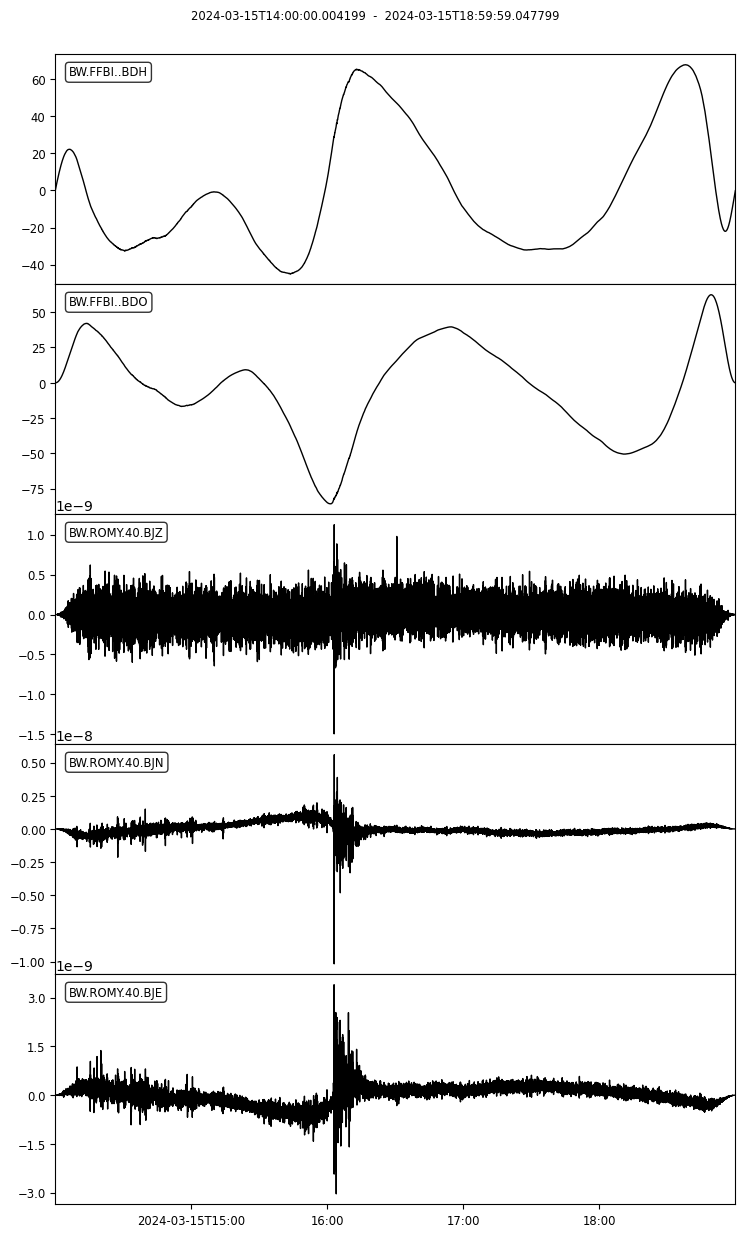

In [5]:
bs.st.plot(equal_scale=False);

In [6]:
# band pass filer
bs.filter_data(fmin=0.0005, fmax=0.05)

# detrend
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.1)


Removing mean and trend...
Applying bandpass filter: 0.0005-0.05 Hz


5 Trace(s) in Stream:
BW.FFBI..BDO   | 2024-03-15T14:00:00.005000Z - 2024-03-15T18:59:59.005000Z | 1.0 Hz, 18000 samples
BW.ROMY.40.BJE | 2024-03-15T14:00:00.047799Z - 2024-03-15T18:59:59.047799Z | 1.0 Hz, 18000 samples
BW.ROMY.40.BJN | 2024-03-15T14:00:00.012800Z - 2024-03-15T18:59:59.012800Z | 1.0 Hz, 18000 samples
BW.ROMY.40.BJZ | 2024-03-15T14:00:00.004199Z - 2024-03-15T18:59:59.004199Z | 1.0 Hz, 18000 samples
BW.FFBI..BDH   | 2024-03-15T14:00:00.005000Z - 2024-03-15T18:59:59.005000Z | 1.0 Hz, 18000 samples

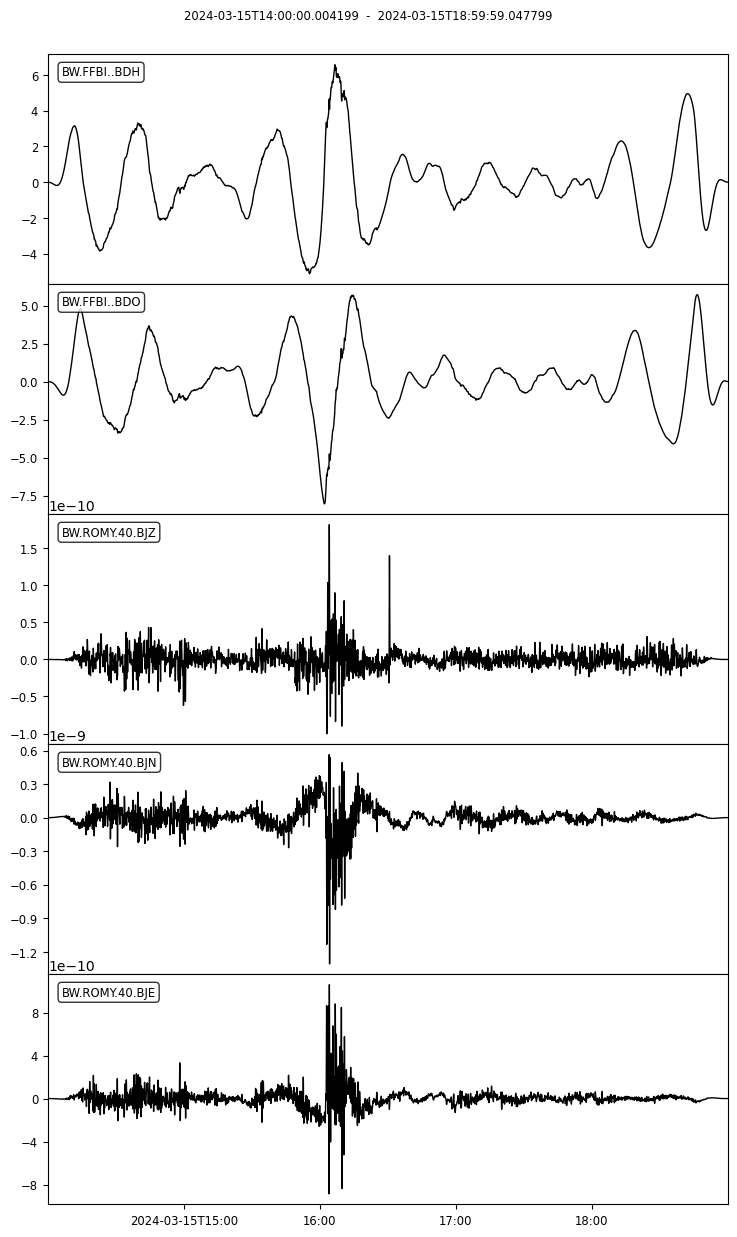

In [7]:
bs.st.plot(equal_scale=False);

 >Integrating ['JZ', 'JN', 'JE']


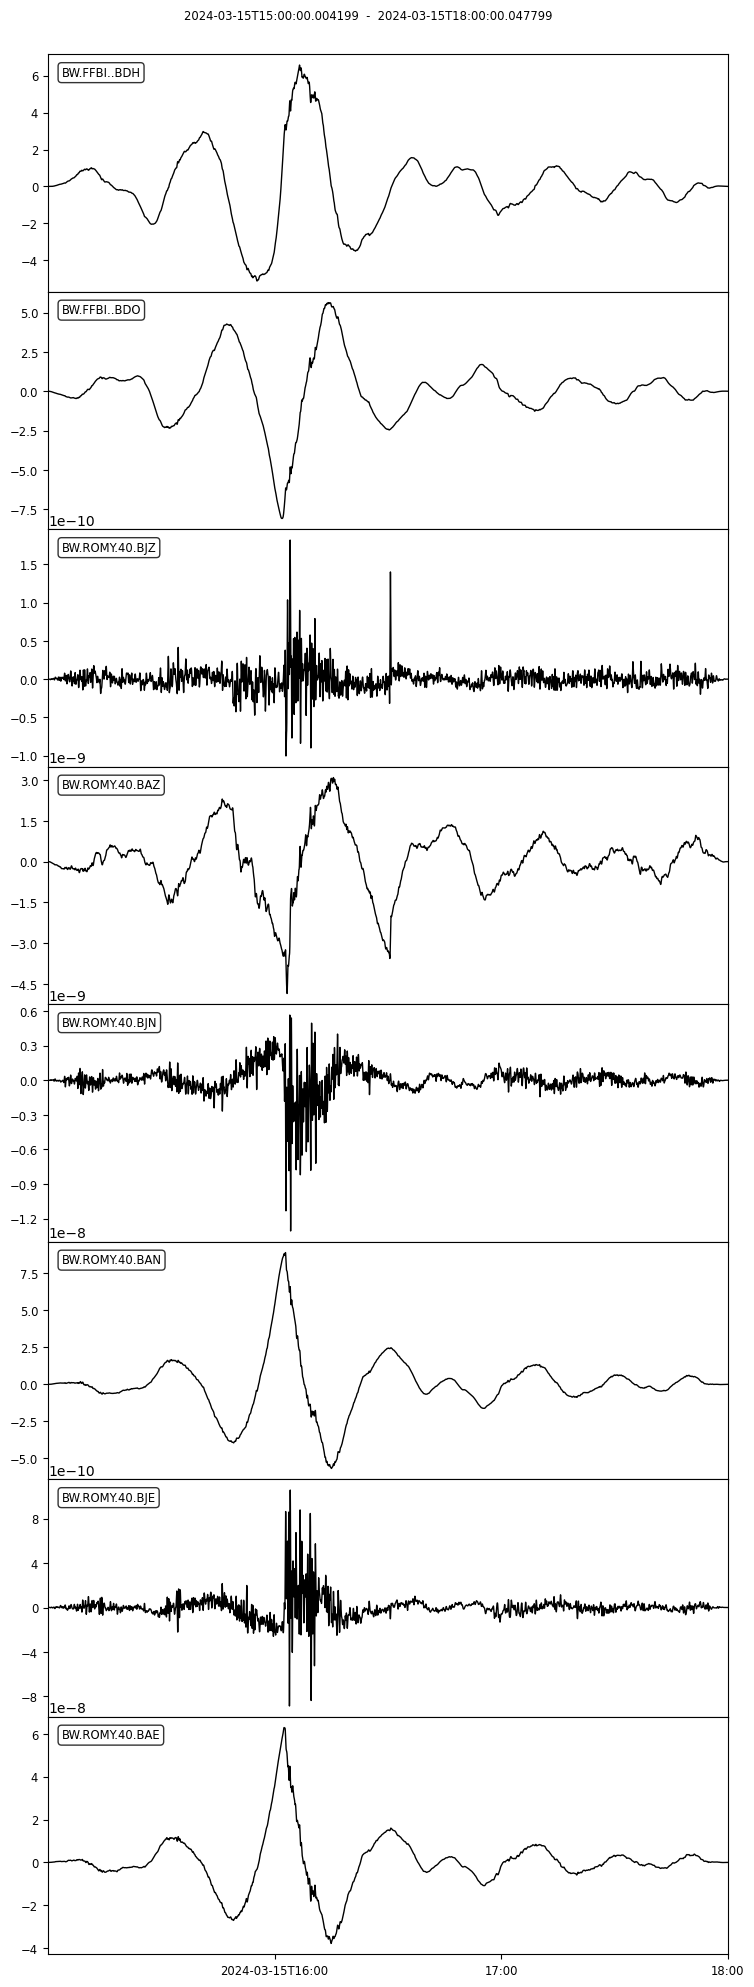

In [8]:

# integrate rotation to tilt
bs.integrate_data(method="cumtrapz") # method = "cumtrapz" or "spline"

# # trim waveforms
bs.st = bs.st.trim(bs.config['tbeg'], bs.config['tend'])

# detrend waveforms
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.05)

# show new waveforms
bs.st.plot(equal_scale=False);


### Compuate and Compare Coherency

In [9]:
Twin = (bs.st[0].stats.npts / bs.st[0].stats.sampling_rate) // 2
overlap = 0.5
smooth_points = 31


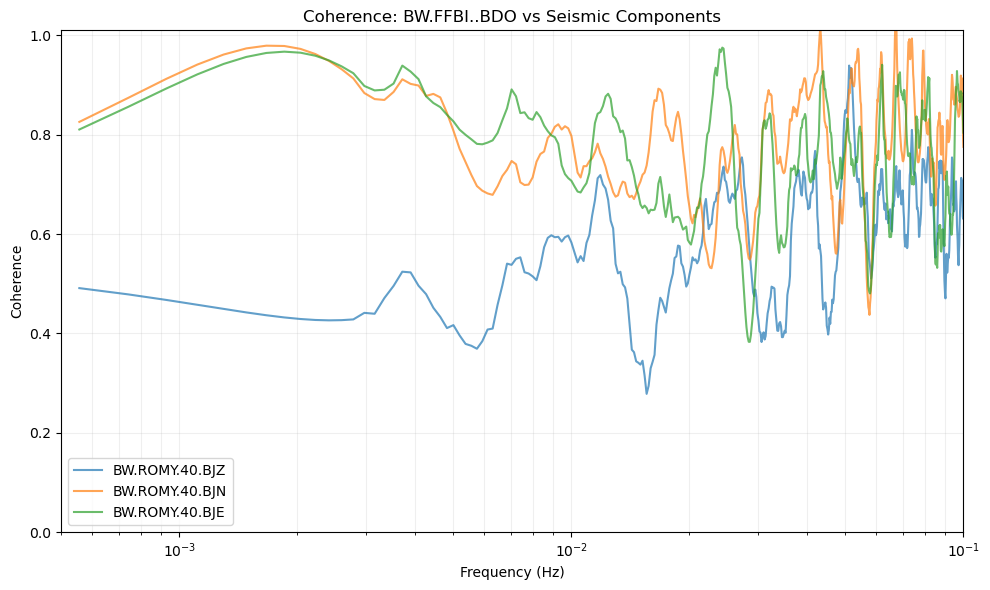

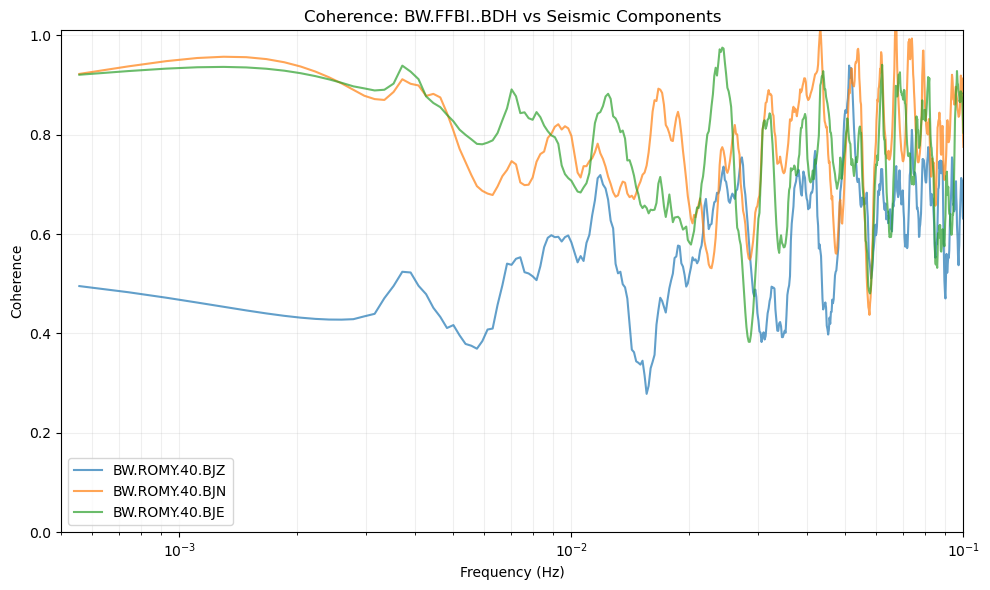

In [10]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDO",
    channels=["BJZ", "BJN", "BJE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.0005,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDH",
    channels=["BJZ", "BJN", "BJE"]

)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.0005,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")


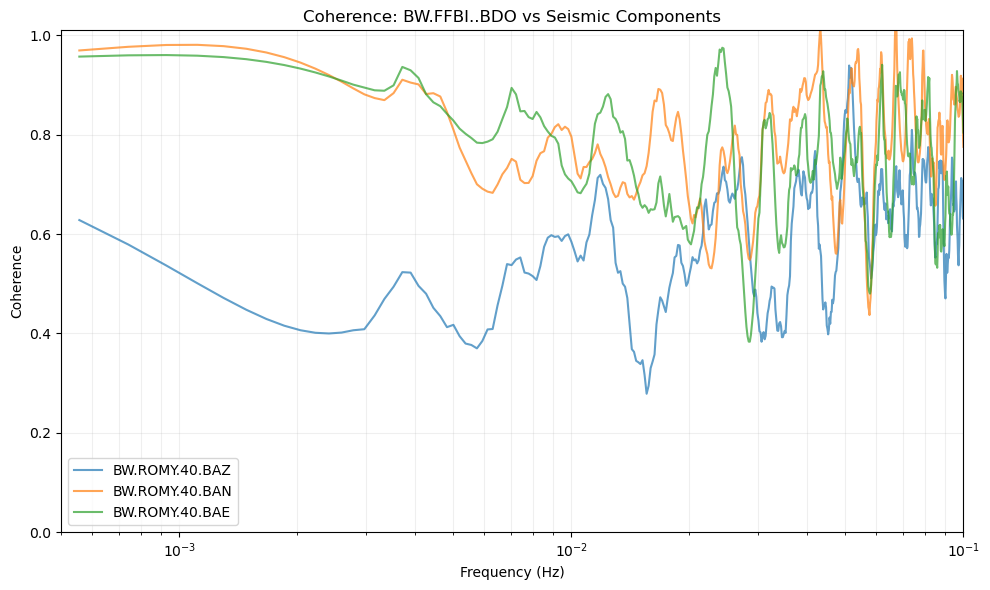

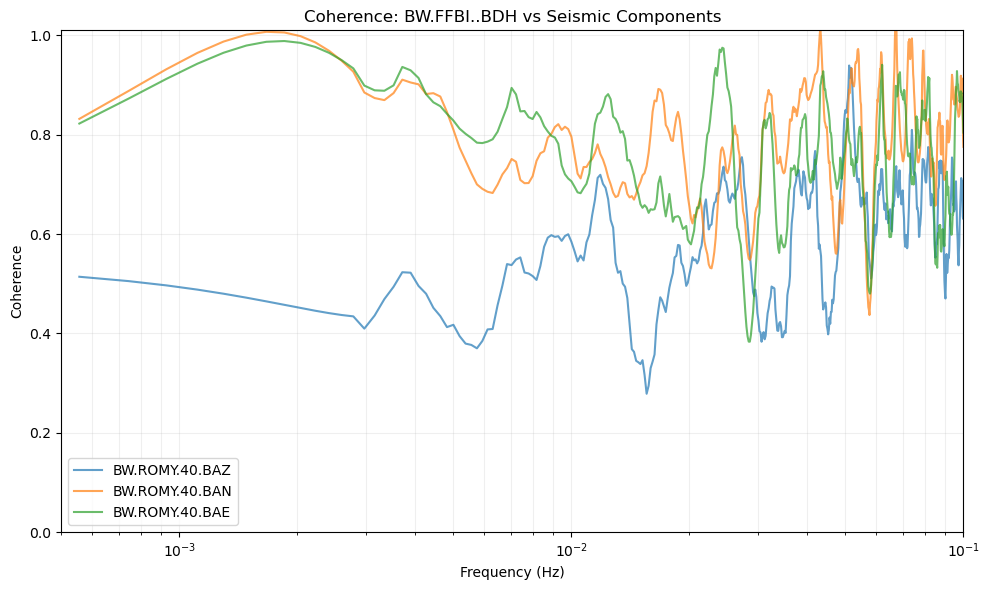

In [11]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDO",
    channels=["BAZ", "BAN", "BAE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.0005,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDH",
    channels=["BAZ", "BAN", "BAE"]
    
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.0005,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")


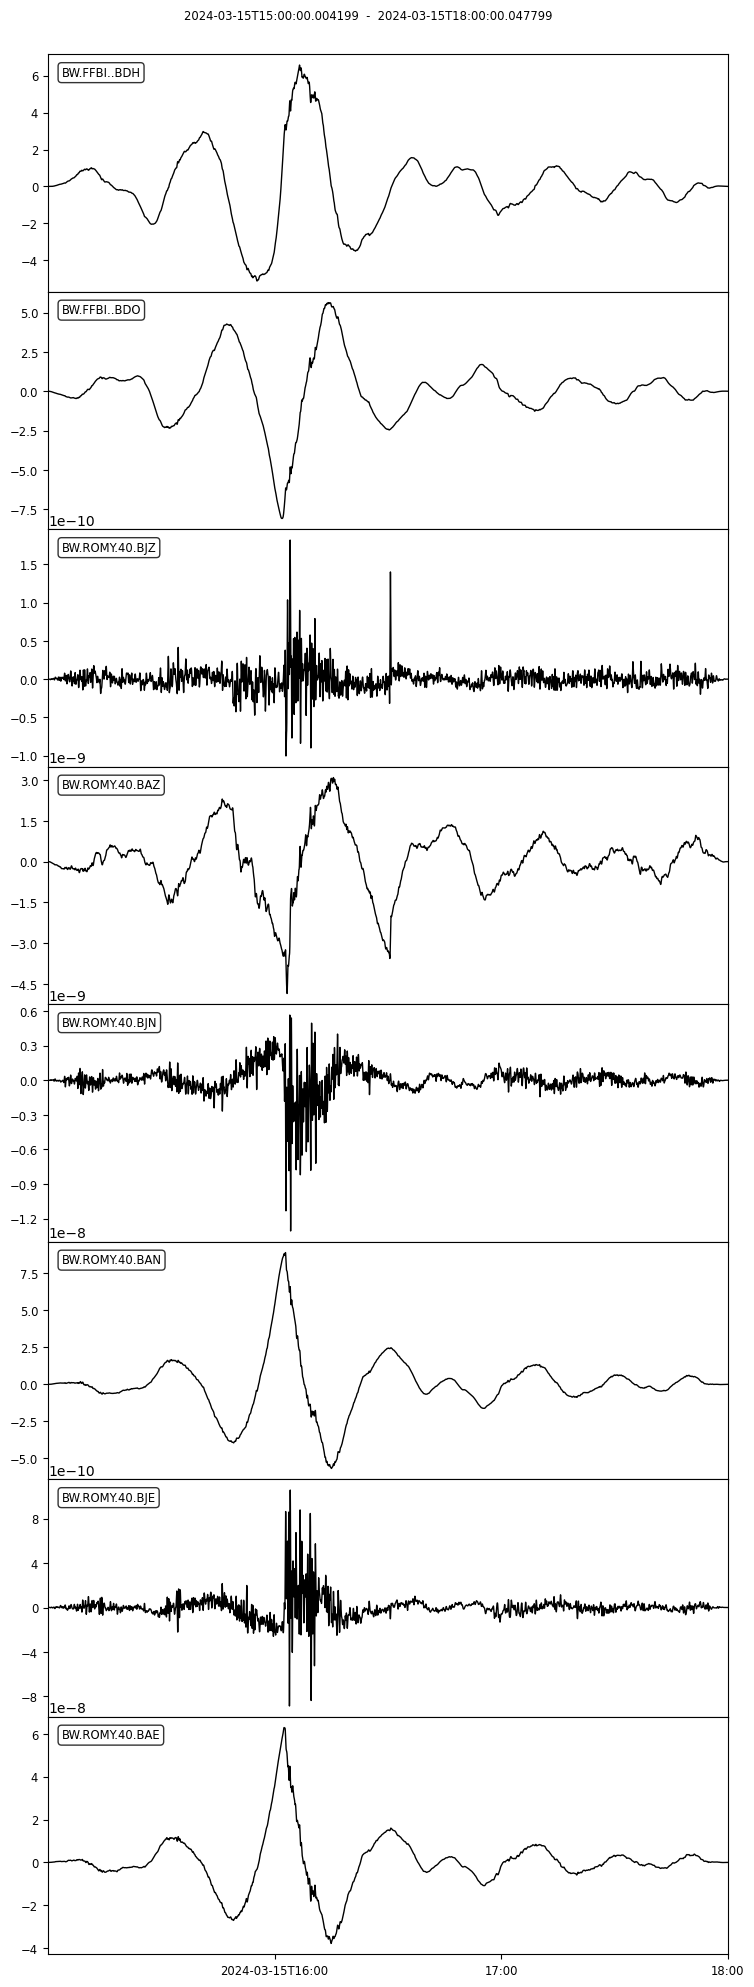

In [12]:
bs.st.plot(equal_scale=False);

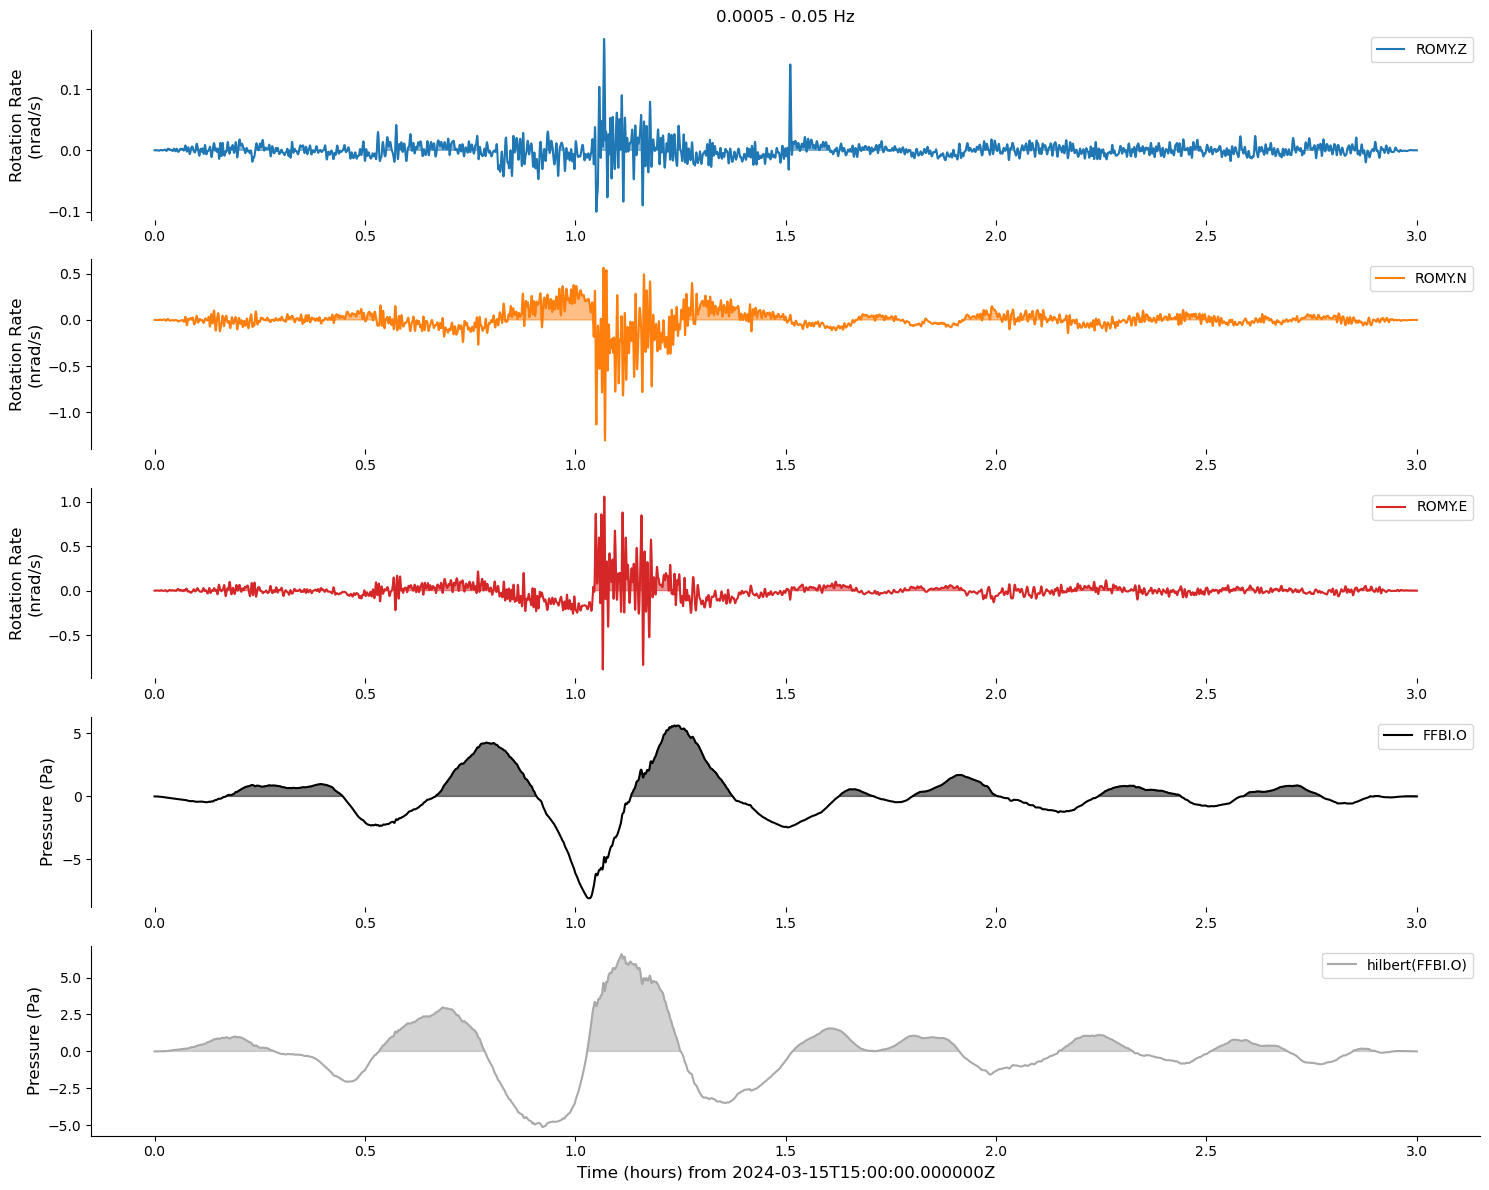

In [13]:
fig = bs.plot_waveforms(bs.st, time_unit="hours")

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_waveforms.png")

Make prediction for tilt


Component N:
P coefficient: -968.452 nrad/hPa
H coefficient: 114.234 nrad/hPa
Variance reduction: 97.5%

Component E:
P coefficient: -642.050 nrad/hPa
H coefficient: 76.262 nrad/hPa
Variance reduction: 97.3%

Component Z:
P coefficient: 44.692 nrad/hPa
H coefficient: 12.000 nrad/hPa
Variance reduction: 64.7%


/home/andbro/cursorfiles/baroseis/src/baroseis.py:2332: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


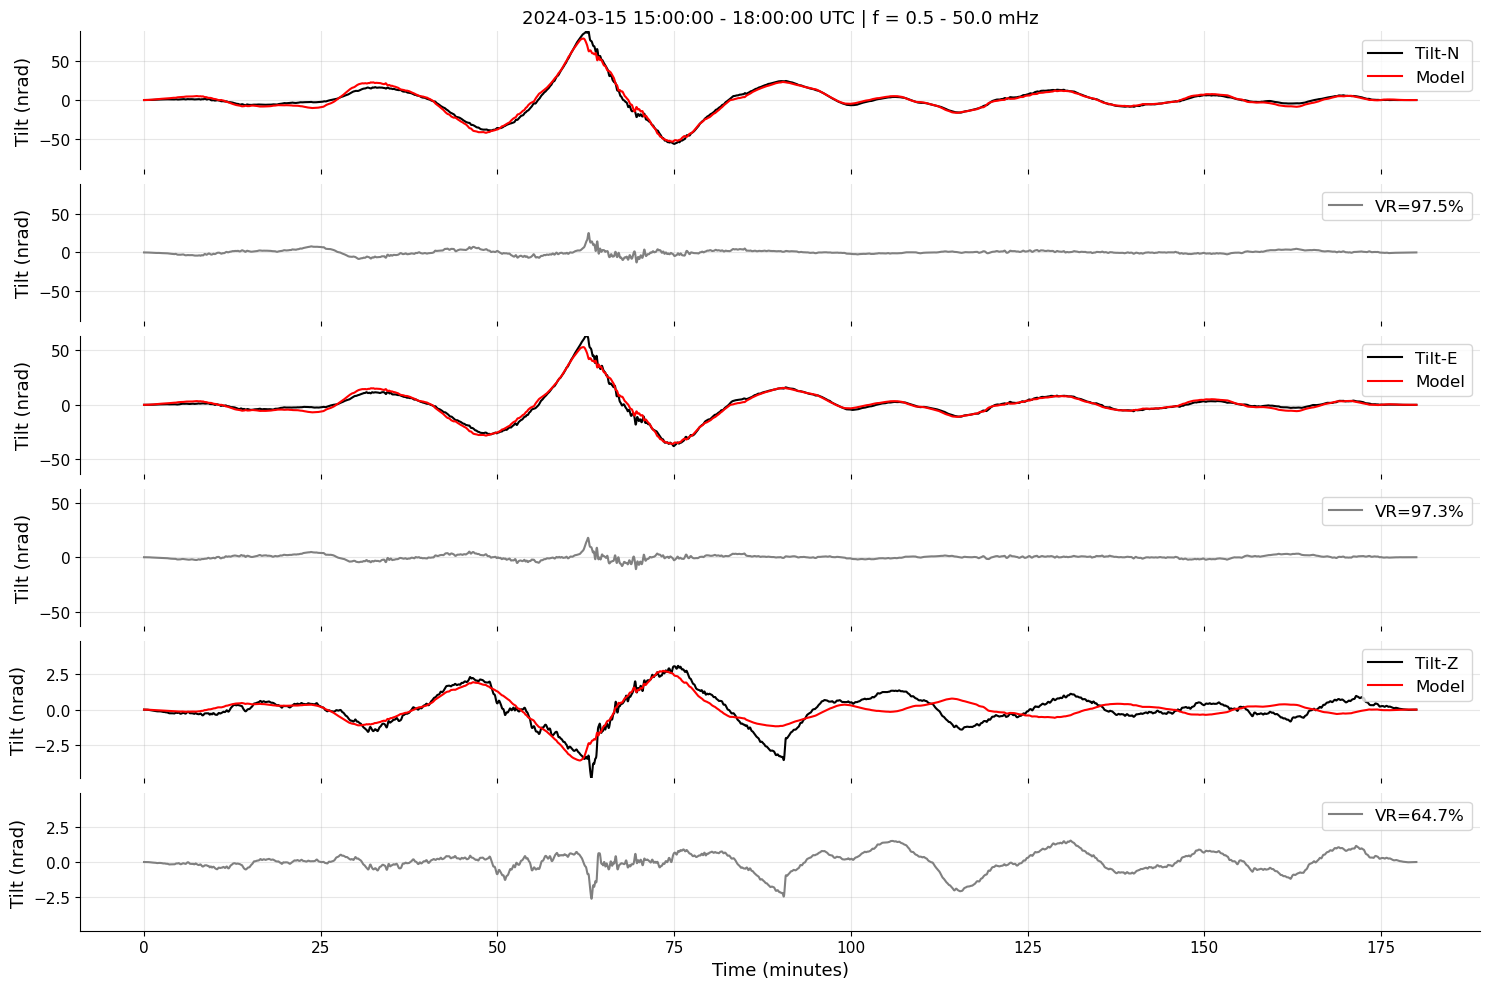

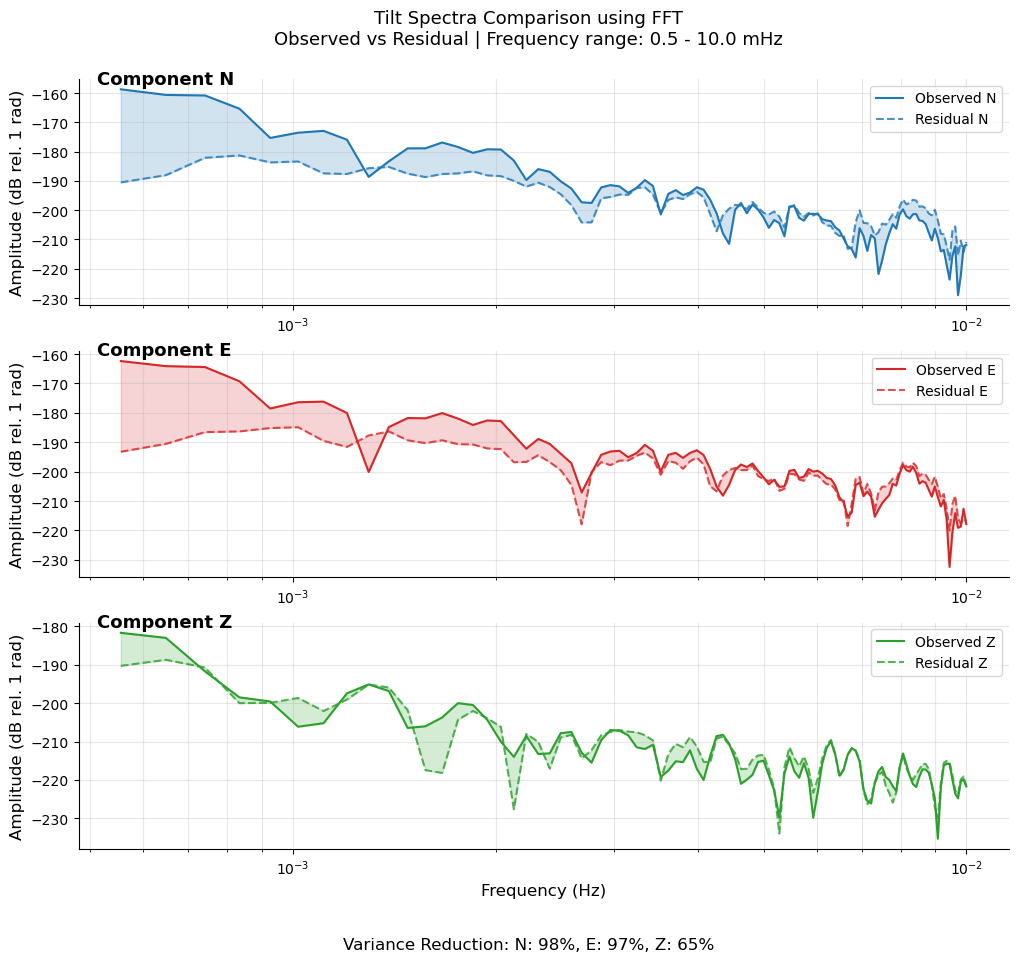

In [14]:
cha = "A"

bs.predict_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,
    zero_intercept=True
)

fig = bs.plot_residuals(
    time_unit="minutes",
    channel_type=cha,
    out=True
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_waveforms.png")

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=0.0005,
    fmax=0.01,
    db_scale=True
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_spectra.png")


Now we use the rotation rate data to fit it with a model based on the barometric data


Component N:
P coefficient: -0.549 nrad/s/hPa
H coefficient: -3.740 nrad/s/hPa
Variance reduction: 40.8%

Component E:
P coefficient: 0.427 nrad/s/hPa
H coefficient: 2.494 nrad/s/hPa
Variance reduction: 25.8%

Component Z:
P coefficient: -0.035 nrad/s/hPa
H coefficient: 0.168 nrad/s/hPa
Variance reduction: 6.2%


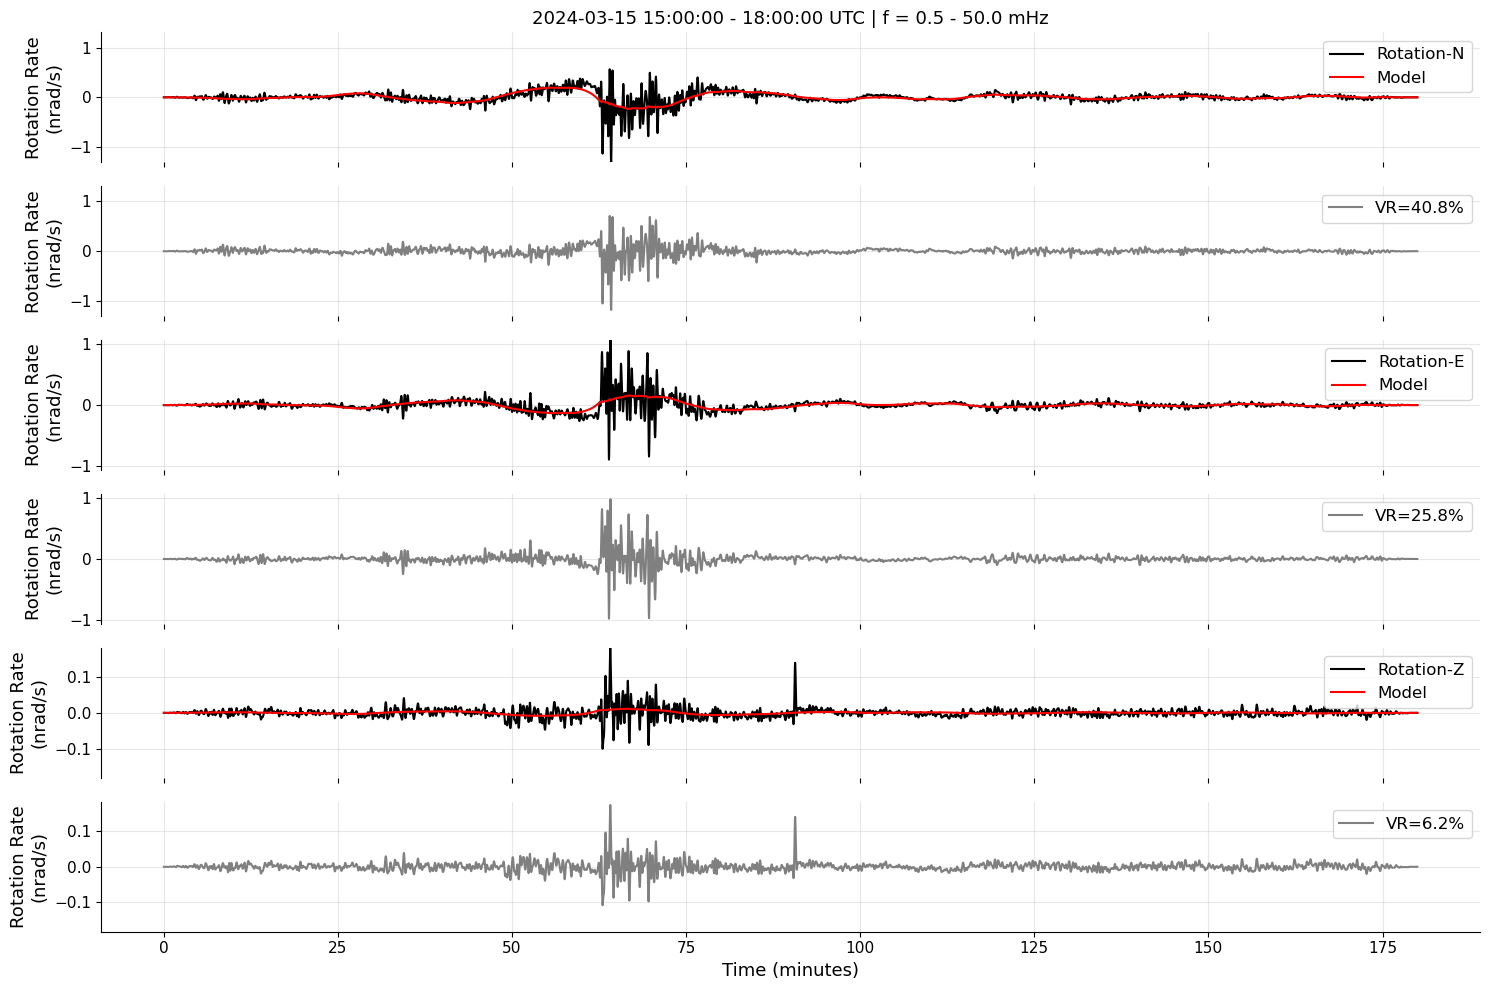

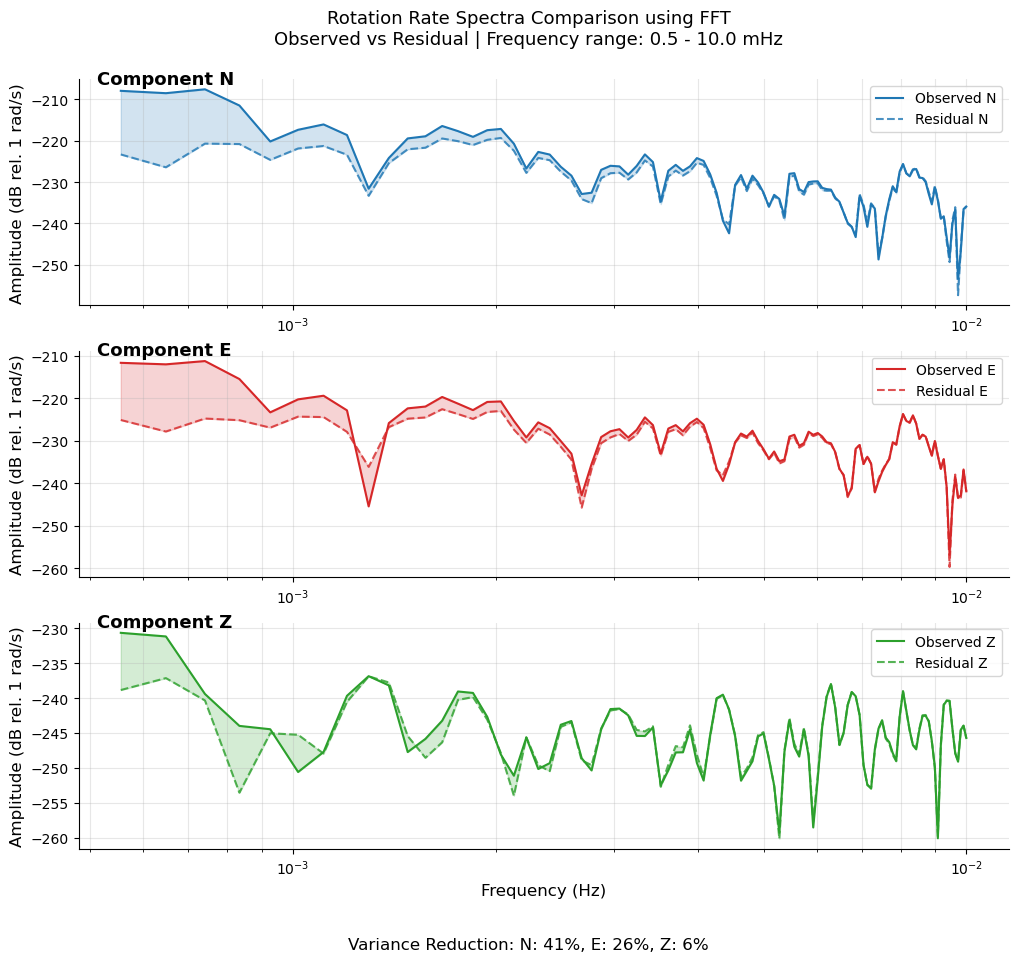

In [15]:
cha = "J"


bs.predict_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,
    zero_intercept=True
)

fig = bs.plot_residuals(
    time_unit="minutes",
    channel_type=cha,
    out=True
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_waveforms.png")

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=0.0005,
    fmax=0.01,
    db_scale=True,
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_spectra.png")


### With Pressure Derivative

Now take the barometric derivatives and use them for modeling the rotation rate


Component N (with derivatives):
P coefficient: -1002.377 nrad/hPa
H coefficient: 82.759 nrad/hPa
DP coefficient: 7929.635 nrad/hPa/s
DH coefficient: -8543.079 nrad/hPa/s
Variance reduction: 97.7%

Component E (with derivatives):
P coefficient: -660.058 nrad/hPa
H coefficient: 35.710 nrad/hPa
DP coefficient: 10217.019 nrad/hPa/s
DH coefficient: -4534.033 nrad/hPa/s
Variance reduction: 97.7%

Component Z (with derivatives):
P coefficient: 47.982 nrad/hPa
H coefficient: 16.136 nrad/hPa
DP coefficient: -1041.946 nrad/hPa/s
DH coefficient: 828.518 nrad/hPa/s
Variance reduction: 65.4%


/home/andbro/cursorfiles/baroseis/src/baroseis.py:2332: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


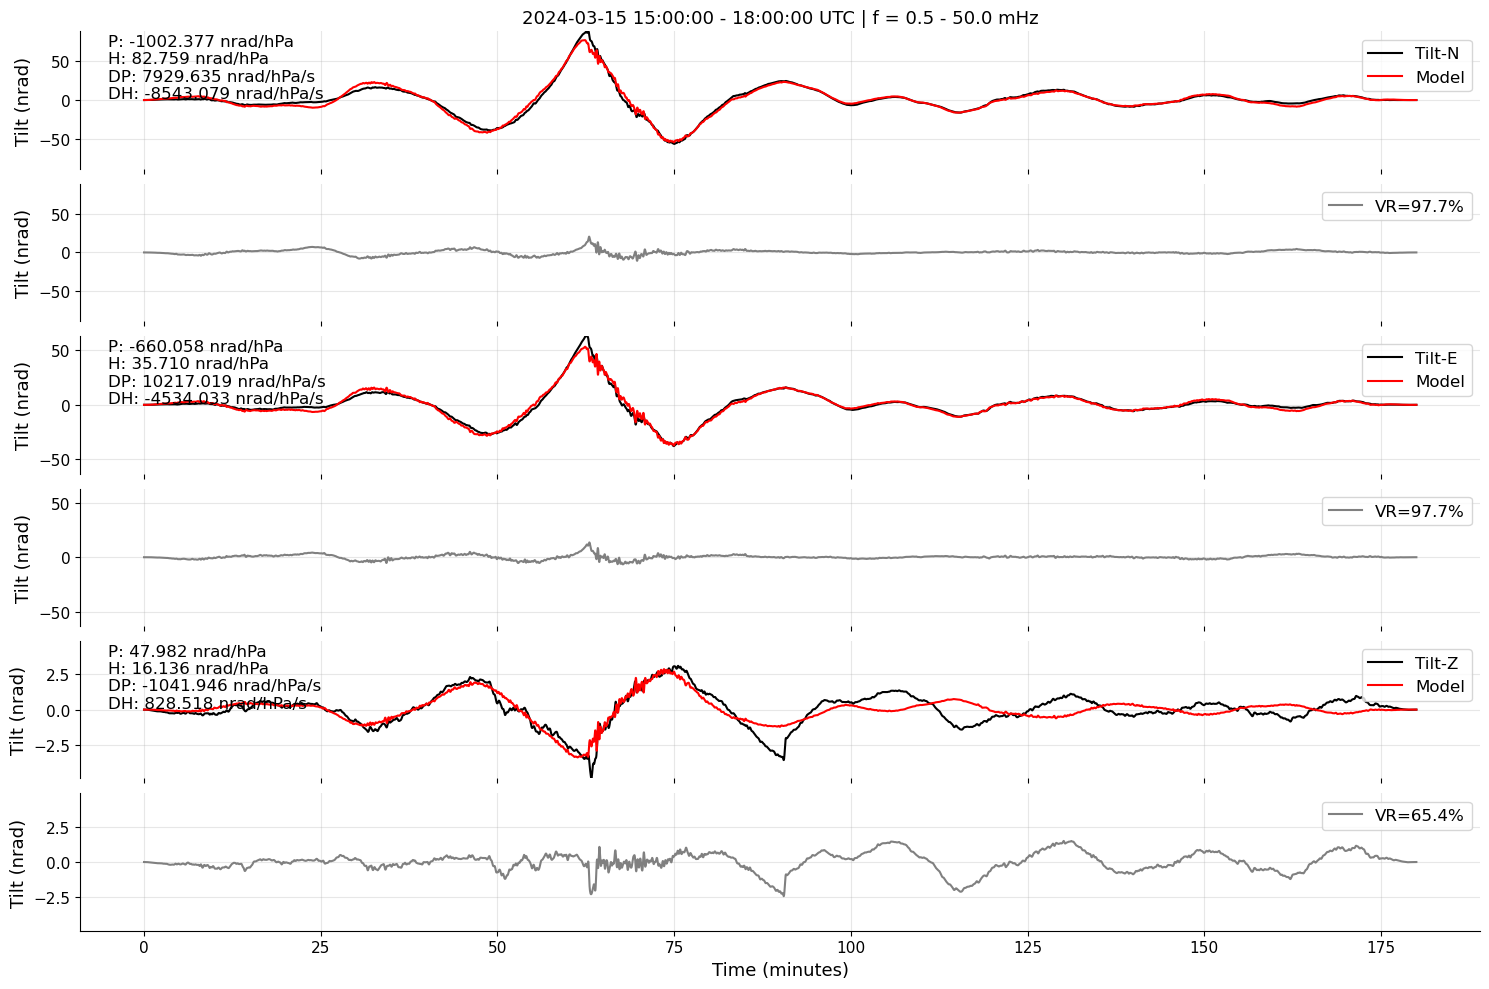

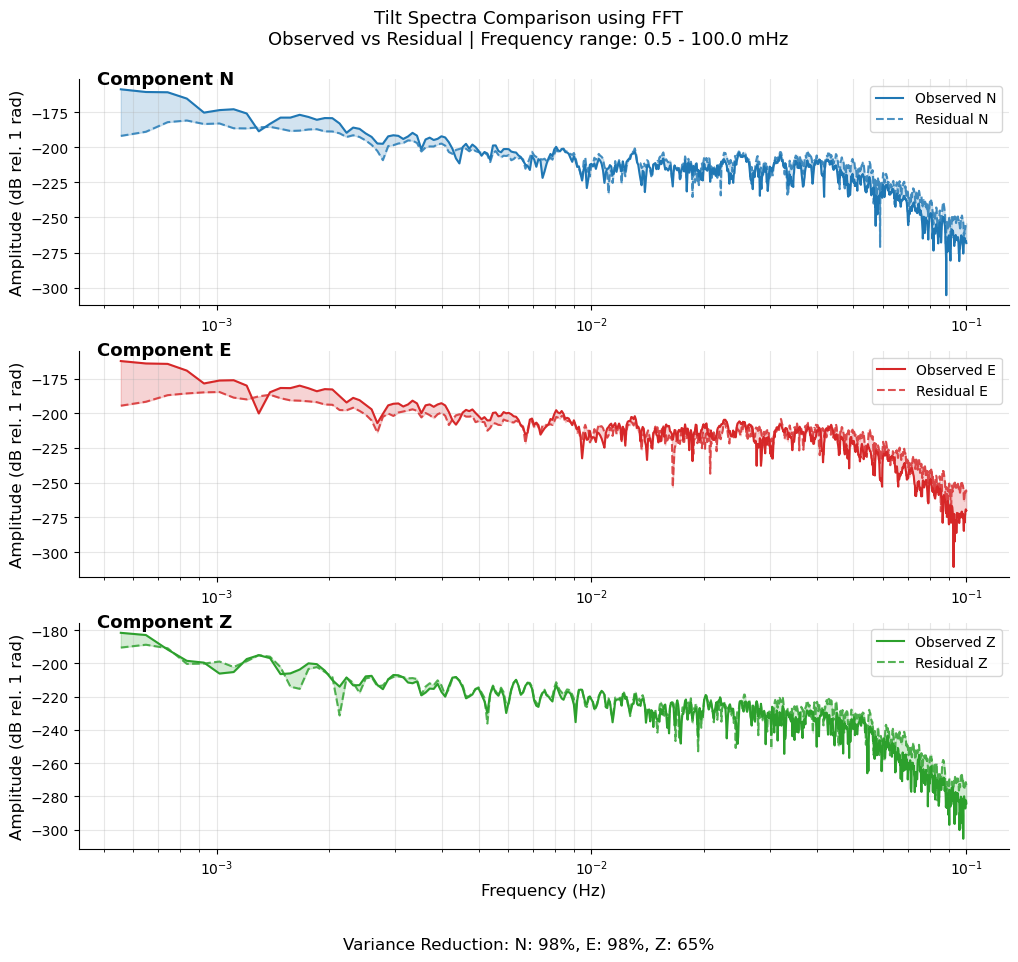

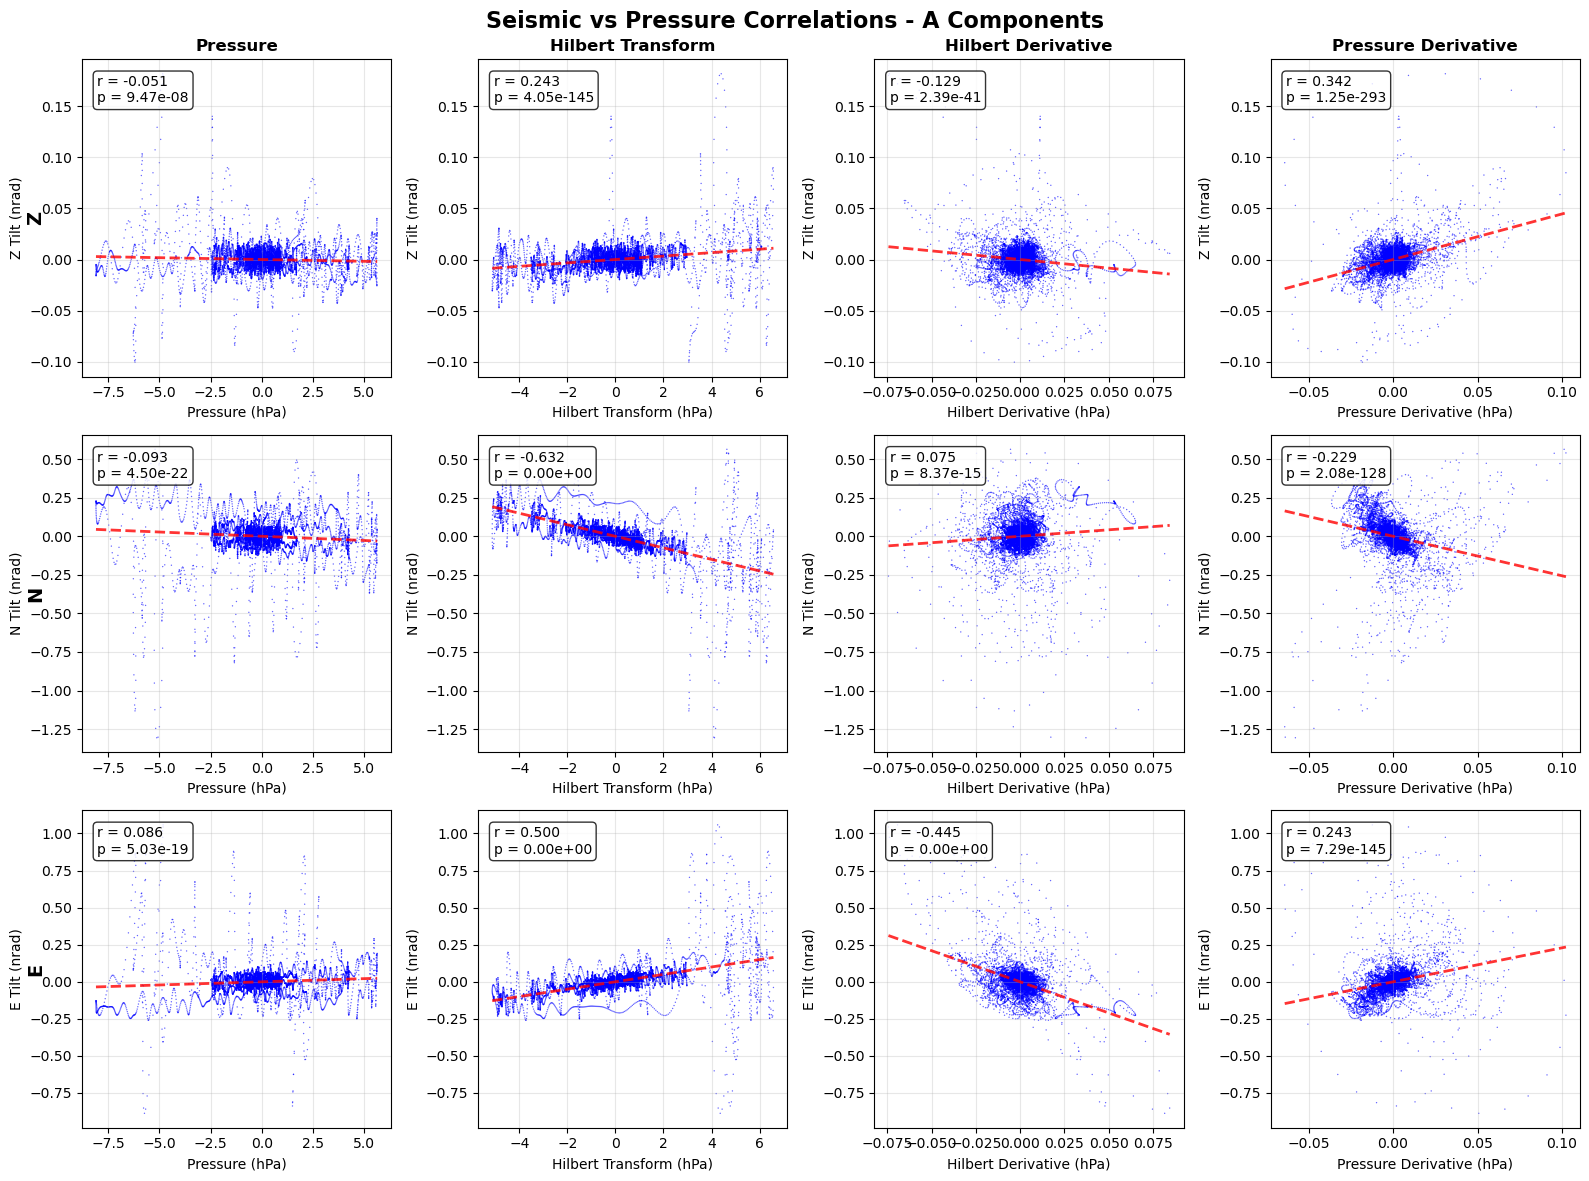

In [ ]:
cha = "A"

bs.model_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,  # for rotation rate
    zero_intercept=True,
    verbose=True,
)

fig = bs.plot_residuals_derivatives(
    channel_type=cha,
    out=True
)

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=0.0005,
    fmax=0.1,
    db_scale=True,
)

fig = bs.plot_scatter_correlations(channel_type=cha, out=True)


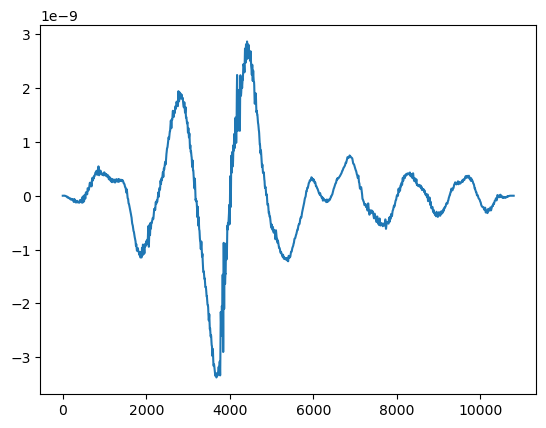

In [24]:
plt.plot(model['Z']['time'], model['Z']['data'])

In [17]:
# _st = bs.st.copy()
# # plt.plot(_st.select(channel="BDO")[0].data)
# for tr in _st:
#     if tr.stats.channel[1] == "D":
#         print(tr.stats.channel)
#         tr = tr.differentiate()
#     if "PP" in tr.stats.location:
#         _st.remove(tr)

# # plt.plot(_st.select(channel="BDO")[0].data)
# bs.st = _st

In [18]:
# bs.predict_tilt_from_pressure(
#     method="least_squares",
#     channel_type="J",
#     zero_intercept=True
# )

# fig = bs.plot_residuals(
#     time_unit="minutes",
#     channel_type="J",
#     out=True
# )

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_J_dev_residual_waveforms.png")

# fig = bs.compare_spectra(
#     method='fft',
#     channel_type='J',
#     fmin=0.0005,
#     fmax=0.01,
#     db_scale=True,
# )

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_J_dev_residual_spectra.png")
